# Best-fitting models

One final step will be to compare the best-fitting models to the disentangled spectra. For this we're going to use `fitplot`.

`fitplot` requires the disentangled spectra; wavelength, flux and names/labels of the comparison models; the light ratio used to scale the disentangled spectra; a dictionary with spectral lines; <br>and the name of the lines/regions you want to display in the plot. Most of these requirements are provided by `span`.

Let's start by specifying the disentangled spectra as we did in the `span` tutorial:

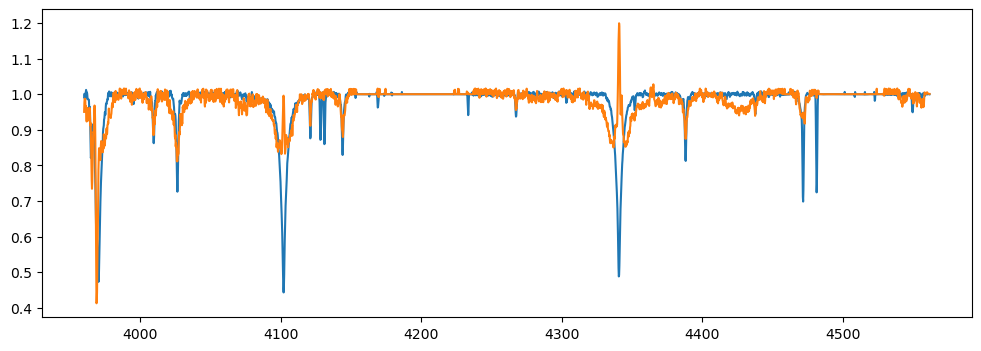

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dsnt_A = './example_spectra/ADIS_lguess_K1K2=0.3_94.0_15.0.txt'
dsnt_B = './example_spectra/BDIS_lguess_K1K2=0.3_94.0_15.0.txt'

df_dsntA = pd.read_csv(dsnt_A, header=None, sep='\t')
df_dsntB = pd.read_csv(dsnt_B, header=None, sep='\s+')

fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(df_dsntA[0], df_dsntA[1])
plt.plot(df_dsntB[0], df_dsntB[1])
plt.show()
plt.close()

We're going to repeat some of the steps in the `span` tutorial to use some of the functionalities in `span`.<br>
First we need the grid:

In [2]:
import numpy as np

teffA = np.linspace(10, 15, 6, dtype=int)
loggA = [20, 22, 24, 26, 28]
rotA = list(range(20, 70, 10))
teffB = [22, 24, 26, 28, 30, 32.5]
loggB = [25, 30, 35, 40]
# rotB = list(range(0, 600, 100))
rotB = [200]
lrat = np.linspace(30, 45, 4)/100
he2h = np.linspace(8, 12, 5)/100

pars_list = [lrat, he2h, teffA, loggA, rotA, teffB, loggB, rotB]

gridlist = [list(l) for l in pars_list]

and then we create the atmfit object

In [3]:
from minato import span as sp

fit_obj = sp.atmfit(gridlist, dsnt_A, dsnt_B, lrat0=0.3)

We have to define which spectral lines we want to retrieve from the dictionary

In [4]:
dic_lines_A = [3995, 4026, 4102, 4121, 4144, 4233, 4267, 4340, 4388, 4471, 4553]
dic_lines_B = [3995, 4026, 4102, 4121, 4144, 4233, 4267, 4340, 4388, 4553]

and we use `user_dic` to create the dictionary. This dictionary contains the regions that will be shown in the pot, and the names of the spectral lines.

In [5]:
usr_dicA = fit_obj.user_dic(dic_lines_A)
usr_dicB = fit_obj.user_dic(dic_lines_B)
display(usr_dicA)
display(usr_dicB)

{3995: {'region': [3990, 4000], 'title': 'N II $\\lambda$3995'},
 4026: {'region': [4005, 4033], 'title': 'He I $\\lambda$4009/26'},
 4102: {'region': [4064, 4117], 'title': 'H$\\delta$'},
 4121: {'region': [4117, 4135],
  'title': 'He I $\\lambda$4121, Si II $\\lambda$4128/32'},
 4144: {'region': [4137, 4151], 'title': 'He I $\\lambda$4144'},
 4233: {'region': [4225, 4241], 'title': 'Fe II $\\lambda$4233'},
 4267: {'region': [4260, 4275], 'title': 'C II $\\lambda$4267'},
 4340: {'region': [4320, 4362], 'title': 'H$\\gamma$'},
 4388: {'region': [4380, 4396], 'title': 'He I $\\lambda$4388'},
 4471: {'region': [4465, 4485],
  'title': 'He I $\\lambda$4471, Mg II $\\lambda$4481'},
 4553: {'region': [4536, 4560],
  'title': 'He II $\\lambda$4542, Si III $\\lambda$4553'}}

{3995: {'region': [3990, 4000], 'title': 'N II $\\lambda$3995'},
 4026: {'region': [4005, 4033], 'title': 'He I $\\lambda$4009/26'},
 4102: {'region': [4064, 4117], 'title': 'H$\\delta$'},
 4121: {'region': [4117, 4135],
  'title': 'He I $\\lambda$4121, Si II $\\lambda$4128/32'},
 4144: {'region': [4137, 4151], 'title': 'He I $\\lambda$4144'},
 4233: {'region': [4225, 4241], 'title': 'Fe II $\\lambda$4233'},
 4267: {'region': [4260, 4275], 'title': 'C II $\\lambda$4267'},
 4340: {'region': [4320, 4362], 'title': 'H$\\gamma$'},
 4388: {'region': [4380, 4396], 'title': 'He I $\\lambda$4388'},
 4553: {'region': [4536, 4560],
  'title': 'He II $\\lambda$4542, Si III $\\lambda$4553'}}

Now we have to do a bit of tweaking. First we have to re-scale the disentangled spectra to the best-fitting value.<br>
From the `working_with_atmfit_results` tutorial, we found a value of 0.4. We use `rescale_flux` for the rescaling. 

In [6]:
lr = 0.40
dsnt_fA, dsnt_fB = fit_obj.rescale_flux(lr)


#     Warning: you are using an initial light ratio of 0.3 



And lastly we obtain the models. From the previous tutorial we found:<br>
T_A = 12.8 kK, logg_A = 2.4, vsini_A = 36 km/s<br>
T_B = 27.6 kK, logg_A = 3.0, vsini_A = 200 km/s

So, we will use the closest available models (and add some extra models for comparison):

In [7]:
modA_w1, modA_f1, modelA1 = fit_obj.get_model(*[13, 24, 40], source='atlas')
modA_w2, modA_f2, modelA2 = fit_obj.get_model(*[11, 24, 40], source='atlas') 
modB_w1, modB_f1, modelB1 = fit_obj.get_model(*[28, 30, 200], source='tlusty')
modB_w2, modB_f2, modelB2 = fit_obj.get_model(*[26, 30, 200], source='tlusty')

But we need to account for the helium enrichment of the primary star. To do this we have to slice the data into the regions that are going to be re-scaled by `He2H_ratio`.

In [8]:
dst_A_w_slc, dst_A_f_slc = fit_obj.slicedata(modA_w1, modA_f1, usr_dicA)
dst_A_w_slc2, dst_A_f_slc2 = fit_obj.slicedata(modA_w2, modA_f2, usr_dicA)

Now we interpolate the flux to the sliced wavelength array and then we can apply `He2H_ratio`

In [9]:
spl_fluxA1 = np.interp(dst_A_w_slc, modA_w1, modA_f1)
spl_fluxA2 = np.interp(dst_A_w_slc2, modA_w2, modA_f2)

In [10]:
flux1 = fit_obj.He2H_ratio(dst_A_w_slc, spl_fluxA1, 0.075, 0.11, usr_dicA, join=True)
flux2 = fit_obj.He2H_ratio(dst_A_w_slc2, spl_fluxA2, 0.075, 0.15, usr_dicA, join=True)

Finally, we can make the plot

>
>#### **Note:** you can provide a single model or a list of models
>

11


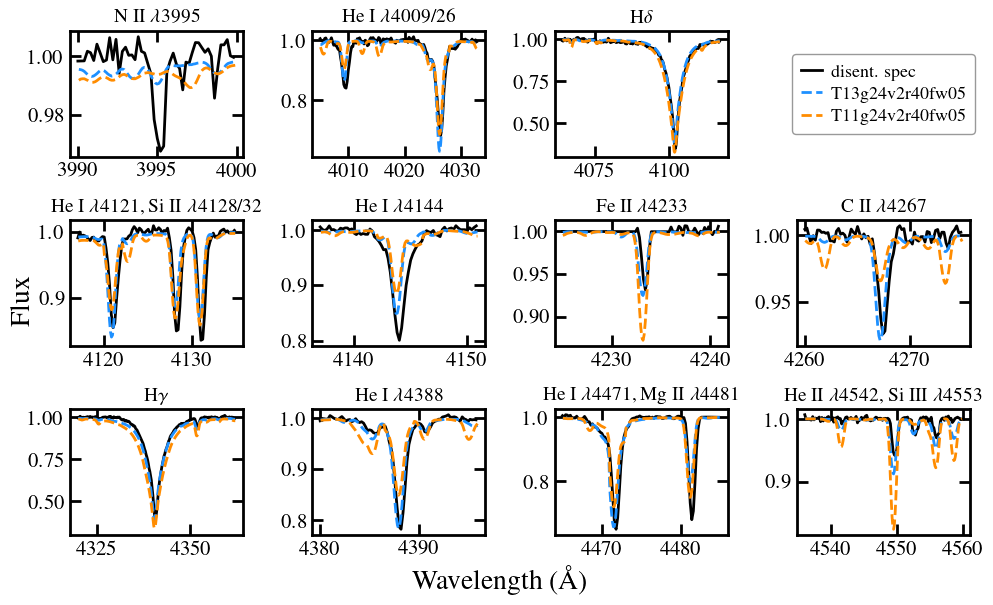

In [11]:
from minato import read_results as rr

# rr.fitplot(df_dsntA[0], dsnt_fA, [dst_A_w_slc], [flux1], [modelA1], lr*100, usr_dicA, dic_lines_A, figu='save', balmer_min_y=0.3)
rr.fitplot(df_dsntA[0], dsnt_fA, [dst_A_w_slc, dst_A_w_slc2], [flux1, flux2], [modelA1, modelA2], lr*100, usr_dicA, dic_lines_A, figu='show', balmer_min_y=0.3)

Since the companion star is not expected to be helium enriched, we can directly plot the recovered models. Hopefully you'll have better data :)

11


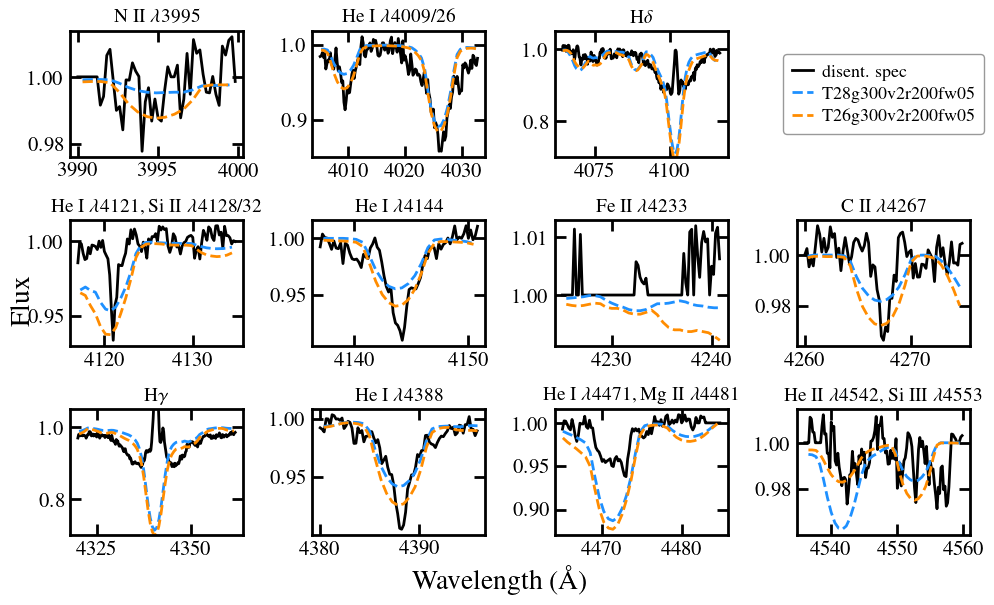

In [12]:
rr.fitplot(df_dsntB[0], dsnt_fB, [modB_w1, modB_w2], [modB_f1, modB_f2], [modelB1, modelB2], lr*100, usr_dicA, dic_lines_A, figu='show', balmer_min_y=0.7)